In [1]:
!pwd

/home/zhimin90/DePaul/CSC695/Github/CSC695-Masters-Research-on-Neural-Network-Time-Series-Attention-Models/DataExploration


In [2]:
CSV_PATH = "/home/zhimin90/DePaul/CSC695/Github/CSC695-Masters-Research-on-Neural-Network-Time-Series-Attention-Models/Asset/"

In [3]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ijzp-q8t2",order="date DESC", limit=1000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,12075381,JD261036,2020-06-10T23:50:00.000,066XX N ASHLAND AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,49,1,06,1164412,1944024,2020,2020-06-17T15:57:35.000,42.002021566,-87.670497326,"{'latitude': '42.002021566', 'longitude': '-87..."
1,12074777,JD260386,2020-06-10T23:49:00.000,007XX E 92ND PL,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,9,44,14,1182752,1843801,2020,2020-06-17T15:57:35.000,41.72659511,-87.606150551,"{'latitude': '41.72659511', 'longitude': '-87...."
2,12074798,JD260387,2020-06-10T23:39:00.000,054XX S LOOMIS BLVD,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,SIDEWALK,False,False,...,20,61,04B,1167925,1868574,2020,2020-06-17T15:57:35.000,41.794906402,-87.659752752,"{'latitude': '41.794906402', 'longitude': '-87..."
3,12074799,JD260384,2020-06-10T23:37:00.000,027XX N MONITOR AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,30,19,08B,1136917,1917631,2020,2020-06-17T15:57:35.000,41.930136251,-87.772285183,"{'latitude': '41.930136251', 'longitude': '-87..."
4,12074806,JD260369,2020-06-10T23:15:00.000,047XX W POLK ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,False,...,24,25,14,1144974,1895945,2020,2020-06-17T15:57:35.000,41.870478987,-87.743225509,"{'latitude': '41.870478987', 'longitude': '-87..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,10617935,HZ370907,2016-07-30T11:00:00.000,104XX S CENTRAL PARK AVE,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,19,74,06,1154181,1835238,2016,2018-02-10T15:50:01.000,41.703711344,-87.711036456,"{'latitude': '41.703711344', 'longitude': '-87..."
999996,10617932,HZ370920,2016-07-30T11:00:00.000,060XX W IRVING PARK RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,38,15,14,1135176,1925960,2016,2018-02-10T15:50:01.000,41.953023006,-87.778484919,"{'latitude': '41.953023006', 'longitude': '-87..."
999997,10617953,HZ370913,2016-07-30T10:58:00.000,016XX E 91ST PL,1780,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,False,...,8,48,20,1188781,1844633,2016,2018-02-10T15:50:01.000,41.72873632,-87.584039463,"{'latitude': '41.72873632', 'longitude': '-87...."
999998,10618025,HZ370905,2016-07-30T10:40:00.000,025XX N NORMANDY AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,...,36,18,06,1131321,1916235,2016,2018-02-10T15:50:01.000,41.926404101,-87.792881805,"{'latitude': '41.926404101', 'longitude': '-87..."


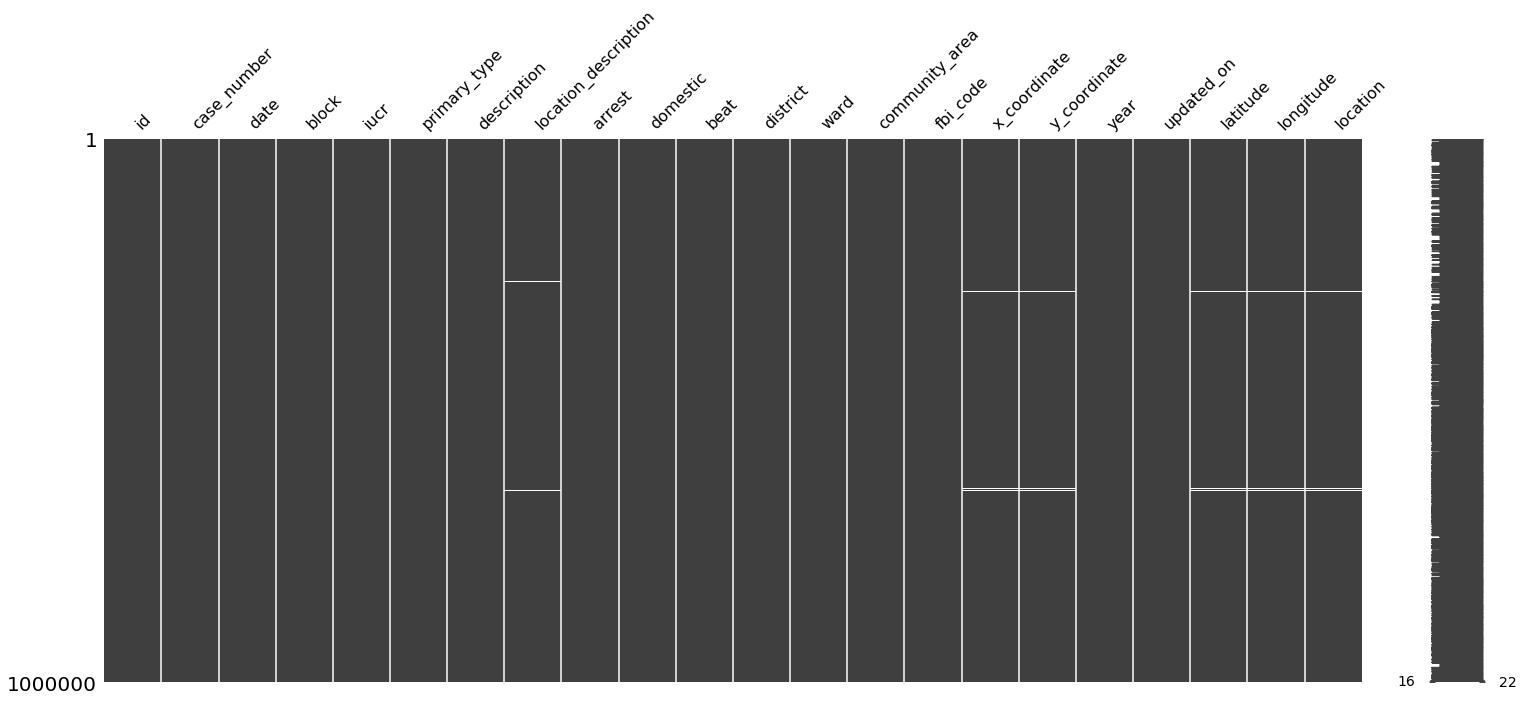

In [5]:
#plot missing variables list
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(results_df)
plt.show()

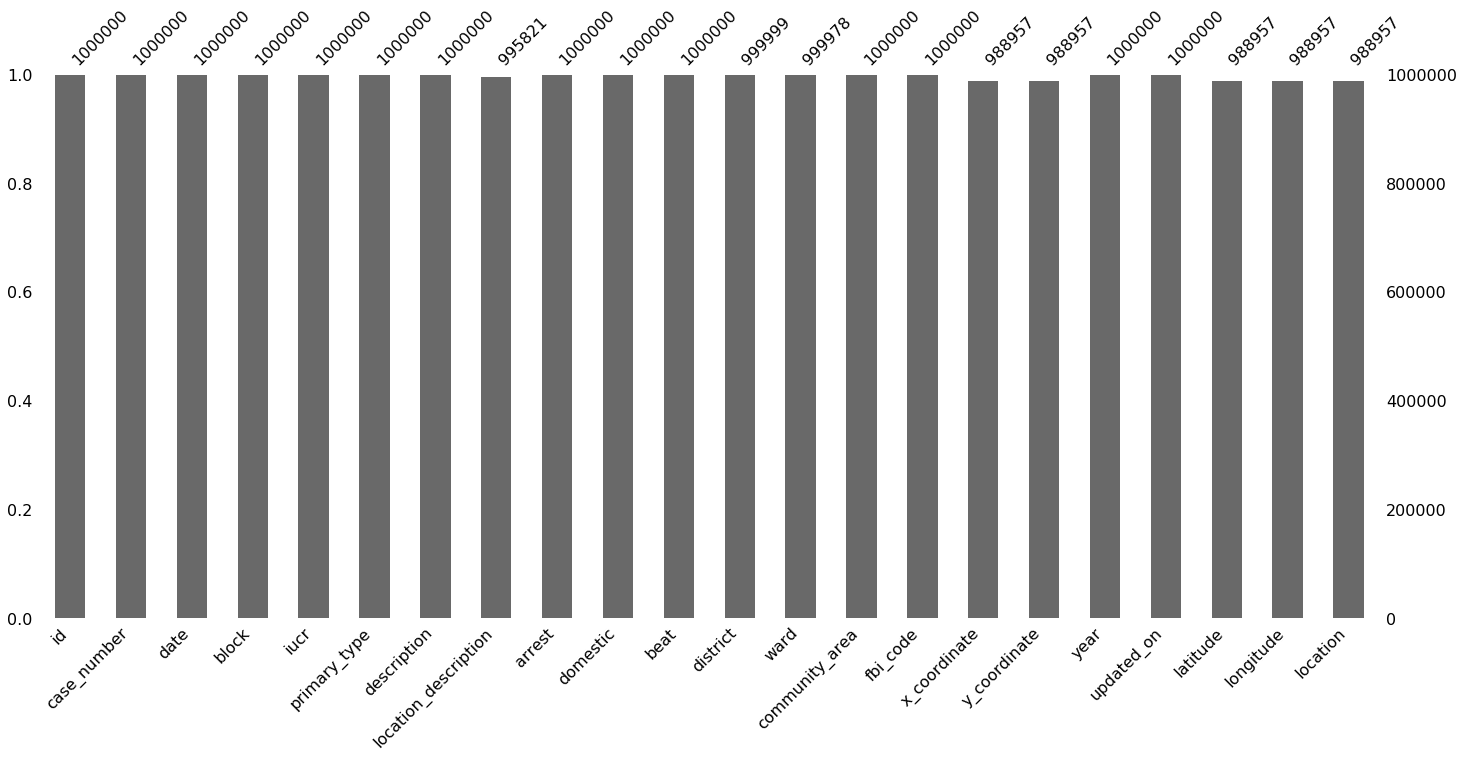

In [6]:
msno.bar(results_df) 

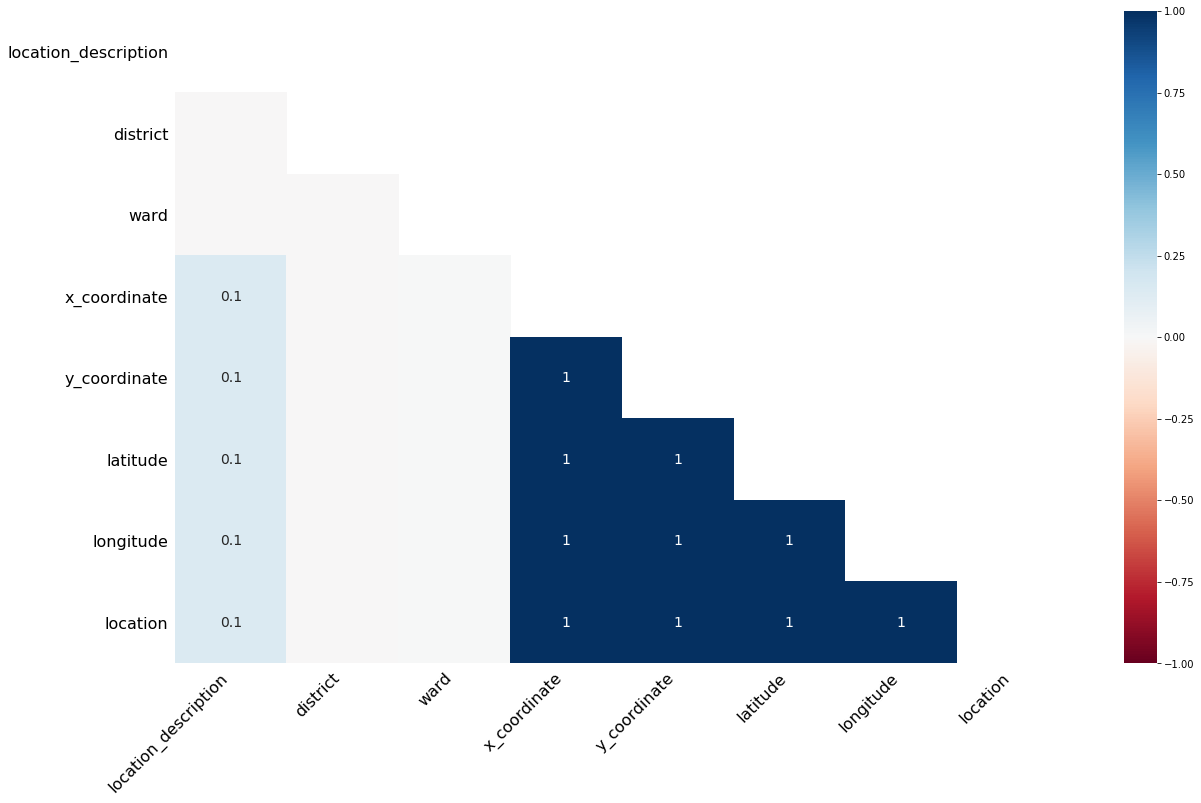

In [7]:
msno.heatmap(results_df) 

In [8]:
results_df.primary_type.value_counts()

THEFT                                238344
BATTERY                              187185
CRIMINAL DAMAGE                      107362
ASSAULT                               75672
DECEPTIVE PRACTICE                    71050
OTHER OFFENSE                         63782
NARCOTICS                             47102
BURGLARY                              45150
MOTOR VEHICLE THEFT                   39206
ROBBERY                               38358
CRIMINAL TRESPASS                     25322
WEAPONS VIOLATION                     21031
OFFENSE INVOLVING CHILDREN             8608
PUBLIC PEACE VIOLATION                 5708
CRIM SEXUAL ASSAULT                    5129
INTERFERENCE WITH PUBLIC OFFICER       4728
SEX OFFENSE                            4257
PROSTITUTION                           2514
HOMICIDE                               2433
ARSON                                  1624
CRIMINAL SEXUAL ASSAULT                 945
LIQUOR LAW VIOLATION                    816
STALKING                        

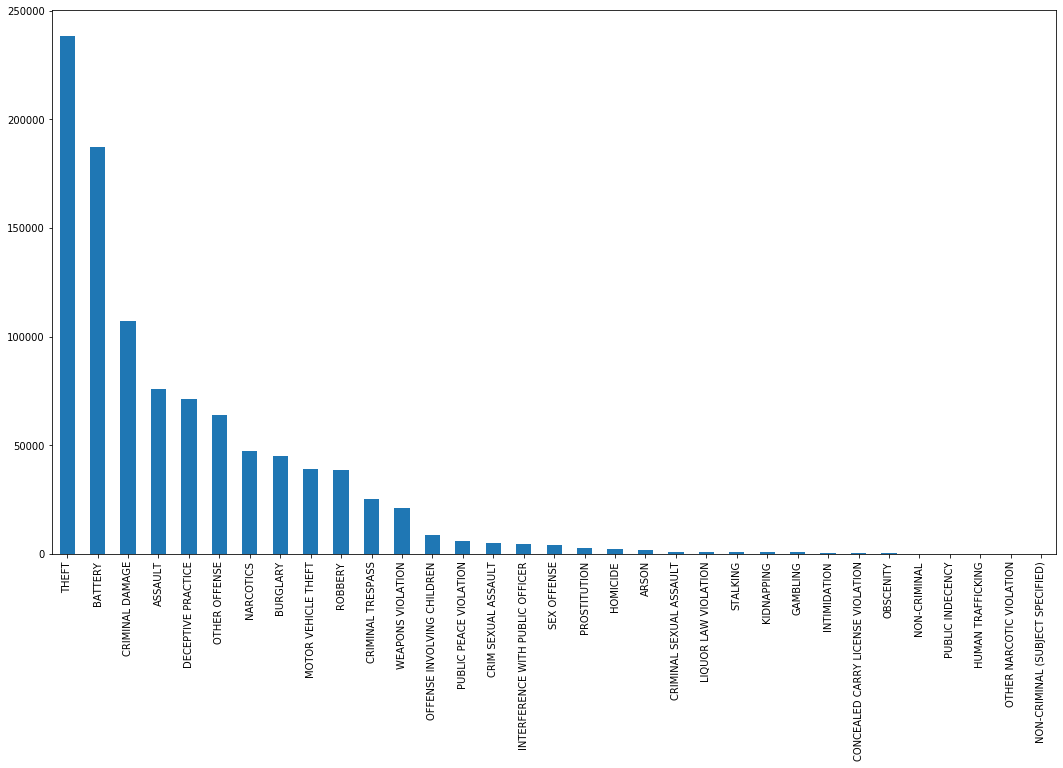

In [9]:
results_df.primary_type.value_counts().plot.bar(figsize=(18,10))

In [10]:
print(max(results_df.date))
print(min(results_df.date))

2020-06-10T23:50:00.000
2016-07-30T10:37:00.000


#### Chicago City Bound

In [11]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [12]:
test_df = results_df
test_df = test_df[test_df.latitude.notna()].sort_values(['date'], ascending=[0])
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['updated_on'] = pd.to_datetime(test_df['updated_on'])
test_df['latitude'] = pd.to_numeric(test_df['latitude'])
test_df['longitude'] = pd.to_numeric(test_df['longitude'])

df = test_df
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [13]:
print(max(test_df['latitude']))
print(min(test_df['latitude']))
print(max(test_df['longitude']))
print(min(test_df['longitude']))

42.022671246
36.619446395
-87.524529378
-91.686565684


In [14]:
print(max(test_df['date']))
print(min(test_df['date']))

2020-06-10 23:50:00
2016-07-30 10:37:00


In [15]:
 df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [16]:
map_arr = []
interval_int = 7 #use 30 days data to predict next 7 days
series_range = 1 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['date'])
date_end = max(df['date'])

geo_price_map = df[['date', 'primary_type','latitude', 'longitude']]

"""geo_price_map = df[['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location']]"""

"geo_price_map = df[['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',\n       'description', 'location_description', 'arrest', 'domestic', 'beat',\n       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',\n       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',\n       'location']]"

In [17]:
filter1a = pd.to_numeric(geo_price_map['longitude']) > xbound[0]
filter1b = pd.to_numeric(geo_price_map['longitude']) < xbound[1]
filter1c = pd.to_numeric(geo_price_map['latitude']) > ybound[0]
filter1d = pd.to_numeric(geo_price_map['latitude']) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 988925


In [18]:
print(max(geo_price_map['latitude']))
print(min(geo_price_map['latitude']))
print(max(geo_price_map['longitude']))
print(min(geo_price_map['longitude']))

42.022671246
41.644818306
-87.524529378
-87.934567226


In [19]:
#crime_2020_gdf = geo_price_map[geo_price_map.date > pd.to_datetime("2020-01-01")]

#### Group data by the windowed interval of 30 days, slide forward in increment of 7 days and aggregate windows into list of dataframes

In [20]:
for int_cur_date in range(0, (date_end - date_start).days - interval_int, int(series_range)):
#for int_start_date in range(365, 565, interval_int):
    geo_price_map_filtered = geo_price_map[geo_price_map['longitude'].notnull()]
    
    #filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_start + timedelta(days=int_start_date))
    #filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_start + timedelta(days=int_start_date+interval_int))
    
    filter2 = geo_price_map_filtered['date'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['date'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("crime count: " + str(geo_price_map_filtered.notnull().sum()))
    
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

2020-06-03 23:50:00
2020-06-10 23:50:00
crime count: date            3331
primary_type    3331
latitude        3331
longitude       3331
dtype: int64
____________________
2020-06-02 23:50:00
2020-06-09 23:50:00
crime count: date            3468
primary_type    3468
latitude        3468
longitude       3468
dtype: int64
____________________
2020-06-01 23:50:00
2020-06-08 23:50:00
crime count: date            3654
primary_type    3654
latitude        3654
longitude       3654
dtype: int64
____________________
2020-05-31 23:50:00
2020-06-07 23:50:00
crime count: date            3940
primary_type    3940
latitude        3940
longitude       3940
dtype: int64
____________________
2020-05-30 23:50:00
2020-06-06 23:50:00
crime count: date            5061
primary_type    5061
latitude        5061
longitude       5061
dtype: int64
____________________
2020-05-29 23:50:00
2020-06-05 23:50:00
crime count: date            5370
primary_type    5370
latitude        5370
longitude       5370
dtype: i

crime count: date            2924
primary_type    2924
latitude        2924
longitude       2924
dtype: int64
____________________
2020-04-15 23:50:00
2020-04-22 23:50:00
crime count: date            2889
primary_type    2889
latitude        2889
longitude       2889
dtype: int64
____________________
2020-04-14 23:50:00
2020-04-21 23:50:00
crime count: date            2856
primary_type    2856
latitude        2856
longitude       2856
dtype: int64
____________________
2020-04-13 23:50:00
2020-04-20 23:50:00
crime count: date            2803
primary_type    2803
latitude        2803
longitude       2803
dtype: int64
____________________
2020-04-12 23:50:00
2020-04-19 23:50:00
crime count: date            2709
primary_type    2709
latitude        2709
longitude       2709
dtype: int64
____________________
2020-04-11 23:50:00
2020-04-18 23:50:00
crime count: date            2753
primary_type    2753
latitude        2753
longitude       2753
dtype: int64
____________________
2020-04-10 23:

crime count: date            4335
primary_type    4335
latitude        4335
longitude       4335
dtype: int64
____________________
2020-02-27 23:50:00
2020-03-05 23:50:00
crime count: date            4281
primary_type    4281
latitude        4281
longitude       4281
dtype: int64
____________________
2020-02-26 23:50:00
2020-03-04 23:50:00
crime count: date            4262
primary_type    4262
latitude        4262
longitude       4262
dtype: int64
____________________
2020-02-25 23:50:00
2020-03-03 23:50:00
crime count: date            4240
primary_type    4240
latitude        4240
longitude       4240
dtype: int64
____________________
2020-02-24 23:50:00
2020-03-02 23:50:00
crime count: date            4120
primary_type    4120
latitude        4120
longitude       4120
dtype: int64
____________________
2020-02-23 23:50:00
2020-03-01 23:50:00
crime count: date            4130
primary_type    4130
latitude        4130
longitude       4130
dtype: int64
____________________
2020-02-22 23:

crime count: date            4299
primary_type    4299
latitude        4299
longitude       4299
dtype: int64
____________________
2020-01-10 23:50:00
2020-01-17 23:50:00
crime count: date            4299
primary_type    4299
latitude        4299
longitude       4299
dtype: int64
____________________
2020-01-09 23:50:00
2020-01-16 23:50:00
crime count: date            4333
primary_type    4333
latitude        4333
longitude       4333
dtype: int64
____________________
2020-01-08 23:50:00
2020-01-15 23:50:00
crime count: date            4289
primary_type    4289
latitude        4289
longitude       4289
dtype: int64
____________________
2020-01-07 23:50:00
2020-01-14 23:50:00
crime count: date            4296
primary_type    4296
latitude        4296
longitude       4296
dtype: int64
____________________
2020-01-06 23:50:00
2020-01-13 23:50:00
crime count: date            4249
primary_type    4249
latitude        4249
longitude       4249
dtype: int64
____________________
2020-01-05 23:

crime count: date            4458
primary_type    4458
latitude        4458
longitude       4458
dtype: int64
____________________
2019-11-23 23:50:00
2019-11-30 23:50:00
crime count: date            4461
primary_type    4461
latitude        4461
longitude       4461
dtype: int64
____________________
2019-11-22 23:50:00
2019-11-29 23:50:00
crime count: date            4504
primary_type    4504
latitude        4504
longitude       4504
dtype: int64
____________________
2019-11-21 23:50:00
2019-11-28 23:50:00
crime count: date            4573
primary_type    4573
latitude        4573
longitude       4573
dtype: int64
____________________
2019-11-20 23:50:00
2019-11-27 23:50:00
crime count: date            4732
primary_type    4732
latitude        4732
longitude       4732
dtype: int64
____________________
2019-11-19 23:50:00
2019-11-26 23:50:00
crime count: date            4818
primary_type    4818
latitude        4818
longitude       4818
dtype: int64
____________________
2019-11-18 23:

crime count: date            4877
primary_type    4877
latitude        4877
longitude       4877
dtype: int64
____________________
2019-10-06 23:50:00
2019-10-13 23:50:00
crime count: date            4925
primary_type    4925
latitude        4925
longitude       4925
dtype: int64
____________________
2019-10-05 23:50:00
2019-10-12 23:50:00
crime count: date            4900
primary_type    4900
latitude        4900
longitude       4900
dtype: int64
____________________
2019-10-04 23:50:00
2019-10-11 23:50:00
crime count: date            4892
primary_type    4892
latitude        4892
longitude       4892
dtype: int64
____________________
2019-10-03 23:50:00
2019-10-10 23:50:00
crime count: date            4882
primary_type    4882
latitude        4882
longitude       4882
dtype: int64
____________________
2019-10-02 23:50:00
2019-10-09 23:50:00
crime count: date            4952
primary_type    4952
latitude        4952
longitude       4952
dtype: int64
____________________
2019-10-01 23:

crime count: date            5224
primary_type    5224
latitude        5224
longitude       5224
dtype: int64
____________________
2019-08-19 23:50:00
2019-08-26 23:50:00
crime count: date            5219
primary_type    5219
latitude        5219
longitude       5219
dtype: int64
____________________
2019-08-18 23:50:00
2019-08-25 23:50:00
crime count: date            5274
primary_type    5274
latitude        5274
longitude       5274
dtype: int64
____________________
2019-08-17 23:50:00
2019-08-24 23:50:00
crime count: date            5267
primary_type    5267
latitude        5267
longitude       5267
dtype: int64
____________________
2019-08-16 23:50:00
2019-08-23 23:50:00
crime count: date            5268
primary_type    5268
latitude        5268
longitude       5268
dtype: int64
____________________
2019-08-15 23:50:00
2019-08-22 23:50:00
crime count: date            5263
primary_type    5263
latitude        5263
longitude       5263
dtype: int64
____________________
2019-08-14 23:

crime count: date            5661
primary_type    5661
latitude        5661
longitude       5661
dtype: int64
____________________
2019-07-02 23:50:00
2019-07-09 23:50:00
crime count: date            5630
primary_type    5630
latitude        5630
longitude       5630
dtype: int64
____________________
2019-07-01 23:50:00
2019-07-08 23:50:00
crime count: date            5652
primary_type    5652
latitude        5652
longitude       5652
dtype: int64
____________________
2019-06-30 23:50:00
2019-07-07 23:50:00
crime count: date            5705
primary_type    5705
latitude        5705
longitude       5705
dtype: int64
____________________
2019-06-29 23:50:00
2019-07-06 23:50:00
crime count: date            5735
primary_type    5735
latitude        5735
longitude       5735
dtype: int64
____________________
2019-06-28 23:50:00
2019-07-05 23:50:00
crime count: date            5784
primary_type    5784
latitude        5784
longitude       5784
dtype: int64
____________________
2019-06-27 23:

crime count: date            5356
primary_type    5356
latitude        5356
longitude       5356
dtype: int64
____________________
2019-05-15 23:50:00
2019-05-22 23:50:00
crime count: date            5320
primary_type    5320
latitude        5320
longitude       5320
dtype: int64
____________________
2019-05-14 23:50:00
2019-05-21 23:50:00
crime count: date            5315
primary_type    5315
latitude        5315
longitude       5315
dtype: int64
____________________
2019-05-13 23:50:00
2019-05-20 23:50:00
crime count: date            5305
primary_type    5305
latitude        5305
longitude       5305
dtype: int64
____________________
2019-05-12 23:50:00
2019-05-19 23:50:00
crime count: date            5290
primary_type    5290
latitude        5290
longitude       5290
dtype: int64
____________________
2019-05-11 23:50:00
2019-05-18 23:50:00
crime count: date            5144
primary_type    5144
latitude        5144
longitude       5144
dtype: int64
____________________
2019-05-10 23:

crime count: date            4757
primary_type    4757
latitude        4757
longitude       4757
dtype: int64
____________________
2019-03-28 23:50:00
2019-04-04 23:50:00
crime count: date            4725
primary_type    4725
latitude        4725
longitude       4725
dtype: int64
____________________
2019-03-27 23:50:00
2019-04-03 23:50:00
crime count: date            4748
primary_type    4748
latitude        4748
longitude       4748
dtype: int64
____________________
2019-03-26 23:50:00
2019-04-02 23:50:00
crime count: date            4761
primary_type    4761
latitude        4761
longitude       4761
dtype: int64
____________________
2019-03-25 23:50:00
2019-04-01 23:50:00
crime count: date            4777
primary_type    4777
latitude        4777
longitude       4777
dtype: int64
____________________
2019-03-24 23:50:00
2019-03-31 23:50:00
crime count: date            4648
primary_type    4648
latitude        4648
longitude       4648
dtype: int64
____________________
2019-03-23 23:

crime count: date            4697
primary_type    4697
latitude        4697
longitude       4697
dtype: int64
____________________
2019-02-08 23:50:00
2019-02-15 23:50:00
crime count: date            4769
primary_type    4769
latitude        4769
longitude       4769
dtype: int64
____________________
2019-02-07 23:50:00
2019-02-14 23:50:00
crime count: date            4676
primary_type    4676
latitude        4676
longitude       4676
dtype: int64
____________________
2019-02-06 23:50:00
2019-02-13 23:50:00
crime count: date            4612
primary_type    4612
latitude        4612
longitude       4612
dtype: int64
____________________
2019-02-05 23:50:00
2019-02-12 23:50:00
crime count: date            4606
primary_type    4606
latitude        4606
longitude       4606
dtype: int64
____________________
2019-02-04 23:50:00
2019-02-11 23:50:00
crime count: date            4595
primary_type    4595
latitude        4595
longitude       4595
dtype: int64
____________________
2019-02-03 23:

crime count: date            4211
primary_type    4211
latitude        4211
longitude       4211
dtype: int64
____________________
2018-12-22 23:50:00
2018-12-29 23:50:00
crime count: date            4178
primary_type    4178
latitude        4178
longitude       4178
dtype: int64
____________________
2018-12-21 23:50:00
2018-12-28 23:50:00
crime count: date            4241
primary_type    4241
latitude        4241
longitude       4241
dtype: int64
____________________
2018-12-20 23:50:00
2018-12-27 23:50:00
crime count: date            4290
primary_type    4290
latitude        4290
longitude       4290
dtype: int64
____________________
2018-12-19 23:50:00
2018-12-26 23:50:00
crime count: date            4433
primary_type    4433
latitude        4433
longitude       4433
dtype: int64
____________________
2018-12-18 23:50:00
2018-12-25 23:50:00
crime count: date            4539
primary_type    4539
latitude        4539
longitude       4539
dtype: int64
____________________
2018-12-17 23:

crime count: date            4721
primary_type    4721
latitude        4721
longitude       4721
dtype: int64
____________________
2018-11-04 23:50:00
2018-11-11 23:50:00
crime count: date            4746
primary_type    4746
latitude        4746
longitude       4746
dtype: int64
____________________
2018-11-03 23:50:00
2018-11-10 23:50:00
crime count: date            4783
primary_type    4783
latitude        4783
longitude       4783
dtype: int64
____________________
2018-11-02 23:50:00
2018-11-09 23:50:00
crime count: date            4919
primary_type    4919
latitude        4919
longitude       4919
dtype: int64
____________________
2018-11-01 23:50:00
2018-11-08 23:50:00
crime count: date            4973
primary_type    4973
latitude        4973
longitude       4973
dtype: int64
____________________
2018-10-31 23:50:00
2018-11-07 23:50:00
crime count: date            5147
primary_type    5147
latitude        5147
longitude       5147
dtype: int64
____________________
2018-10-30 23:

crime count: date            5416
primary_type    5416
latitude        5416
longitude       5416
dtype: int64
____________________
2018-09-17 23:50:00
2018-09-24 23:50:00
crime count: date            5405
primary_type    5405
latitude        5405
longitude       5405
dtype: int64
____________________
2018-09-16 23:50:00
2018-09-23 23:50:00
crime count: date            5393
primary_type    5393
latitude        5393
longitude       5393
dtype: int64
____________________
2018-09-15 23:50:00
2018-09-22 23:50:00
crime count: date            5453
primary_type    5453
latitude        5453
longitude       5453
dtype: int64
____________________
2018-09-14 23:50:00
2018-09-21 23:50:00
crime count: date            5440
primary_type    5440
latitude        5440
longitude       5440
dtype: int64
____________________
2018-09-13 23:50:00
2018-09-20 23:50:00
crime count: date            5484
primary_type    5484
latitude        5484
longitude       5484
dtype: int64
____________________
2018-09-12 23:

crime count: date            5814
primary_type    5814
latitude        5814
longitude       5814
dtype: int64
____________________
2018-07-31 23:50:00
2018-08-07 23:50:00
crime count: date            5913
primary_type    5913
latitude        5913
longitude       5913
dtype: int64
____________________
2018-07-30 23:50:00
2018-08-06 23:50:00
crime count: date            5953
primary_type    5953
latitude        5953
longitude       5953
dtype: int64
____________________
2018-07-29 23:50:00
2018-08-05 23:50:00
crime count: date            5933
primary_type    5933
latitude        5933
longitude       5933
dtype: int64
____________________
2018-07-28 23:50:00
2018-08-04 23:50:00
crime count: date            5848
primary_type    5848
latitude        5848
longitude       5848
dtype: int64
____________________
2018-07-27 23:50:00
2018-08-03 23:50:00
crime count: date            5747
primary_type    5747
latitude        5747
longitude       5747
dtype: int64
____________________
2018-07-26 23:

crime count: date            5622
primary_type    5622
latitude        5622
longitude       5622
dtype: int64
____________________
2018-06-13 23:50:00
2018-06-20 23:50:00
crime count: date            5712
primary_type    5712
latitude        5712
longitude       5712
dtype: int64
____________________
2018-06-12 23:50:00
2018-06-19 23:50:00
crime count: date            5576
primary_type    5576
latitude        5576
longitude       5576
dtype: int64
____________________
2018-06-11 23:50:00
2018-06-18 23:50:00
crime count: date            5571
primary_type    5571
latitude        5571
longitude       5571
dtype: int64
____________________
2018-06-10 23:50:00
2018-06-17 23:50:00
crime count: date            5482
primary_type    5482
latitude        5482
longitude       5482
dtype: int64
____________________
2018-06-09 23:50:00
2018-06-16 23:50:00
crime count: date            5380
primary_type    5380
latitude        5380
longitude       5380
dtype: int64
____________________
2018-06-08 23:

crime count: date            5459
primary_type    5459
latitude        5459
longitude       5459
dtype: int64
____________________
2018-04-26 23:50:00
2018-05-03 23:50:00
crime count: date            5420
primary_type    5420
latitude        5420
longitude       5420
dtype: int64
____________________
2018-04-25 23:50:00
2018-05-02 23:50:00
crime count: date            5412
primary_type    5412
latitude        5412
longitude       5412
dtype: int64
____________________
2018-04-24 23:50:00
2018-05-01 23:50:00
crime count: date            5371
primary_type    5371
latitude        5371
longitude       5371
dtype: int64
____________________
2018-04-23 23:50:00
2018-04-30 23:50:00
crime count: date            5128
primary_type    5128
latitude        5128
longitude       5128
dtype: int64
____________________
2018-04-22 23:50:00
2018-04-29 23:50:00
crime count: date            5053
primary_type    5053
latitude        5053
longitude       5053
dtype: int64
____________________
2018-04-21 23:

crime count: date            4714
primary_type    4714
latitude        4714
longitude       4714
dtype: int64
____________________
2018-03-09 23:50:00
2018-03-16 23:50:00
crime count: date            4623
primary_type    4623
latitude        4623
longitude       4623
dtype: int64
____________________
2018-03-08 23:50:00
2018-03-15 23:50:00
crime count: date            4661
primary_type    4661
latitude        4661
longitude       4661
dtype: int64
____________________
2018-03-07 23:50:00
2018-03-14 23:50:00
crime count: date            4635
primary_type    4635
latitude        4635
longitude       4635
dtype: int64
____________________
2018-03-06 23:50:00
2018-03-13 23:50:00
crime count: date            4623
primary_type    4623
latitude        4623
longitude       4623
dtype: int64
____________________
2018-03-05 23:50:00
2018-03-12 23:50:00
crime count: date            4635
primary_type    4635
latitude        4635
longitude       4635
dtype: int64
____________________
2018-03-04 23:

crime count: date            4847
primary_type    4847
latitude        4847
longitude       4847
dtype: int64
____________________
2018-01-20 23:50:00
2018-01-27 23:50:00
crime count: date            4900
primary_type    4900
latitude        4900
longitude       4900
dtype: int64
____________________
2018-01-19 23:50:00
2018-01-26 23:50:00
crime count: date            4870
primary_type    4870
latitude        4870
longitude       4870
dtype: int64
____________________
2018-01-18 23:50:00
2018-01-25 23:50:00
crime count: date            4814
primary_type    4814
latitude        4814
longitude       4814
dtype: int64
____________________
2018-01-17 23:50:00
2018-01-24 23:50:00
crime count: date            4795
primary_type    4795
latitude        4795
longitude       4795
dtype: int64
____________________
2018-01-16 23:50:00
2018-01-23 23:50:00
crime count: date            4830
primary_type    4830
latitude        4830
longitude       4830
dtype: int64
____________________
2018-01-15 23:

crime count: date            4719
primary_type    4719
latitude        4719
longitude       4719
dtype: int64
____________________
2017-12-03 23:50:00
2017-12-10 23:50:00
crime count: date            4793
primary_type    4793
latitude        4793
longitude       4793
dtype: int64
____________________
2017-12-02 23:50:00
2017-12-09 23:50:00
crime count: date            4803
primary_type    4803
latitude        4803
longitude       4803
dtype: int64
____________________
2017-12-01 23:50:00
2017-12-08 23:50:00
crime count: date            4903
primary_type    4903
latitude        4903
longitude       4903
dtype: int64
____________________
2017-11-30 23:50:00
2017-12-07 23:50:00
crime count: date            4995
primary_type    4995
latitude        4995
longitude       4995
dtype: int64
____________________
2017-11-29 23:50:00
2017-12-06 23:50:00
crime count: date            5107
primary_type    5107
latitude        5107
longitude       5107
dtype: int64
____________________
2017-11-28 23:

crime count: date            5284
primary_type    5284
latitude        5284
longitude       5284
dtype: int64
____________________
2017-10-16 23:50:00
2017-10-23 23:50:00
crime count: date            5311
primary_type    5311
latitude        5311
longitude       5311
dtype: int64
____________________
2017-10-15 23:50:00
2017-10-22 23:50:00
crime count: date            5337
primary_type    5337
latitude        5337
longitude       5337
dtype: int64
____________________
2017-10-14 23:50:00
2017-10-21 23:50:00
crime count: date            5238
primary_type    5238
latitude        5238
longitude       5238
dtype: int64
____________________
2017-10-13 23:50:00
2017-10-20 23:50:00
crime count: date            5074
primary_type    5074
latitude        5074
longitude       5074
dtype: int64
____________________
2017-10-12 23:50:00
2017-10-19 23:50:00
crime count: date            5002
primary_type    5002
latitude        5002
longitude       5002
dtype: int64
____________________
2017-10-11 23:

crime count: date            5116
primary_type    5116
latitude        5116
longitude       5116
dtype: int64
____________________
2017-08-29 23:50:00
2017-09-05 23:50:00
crime count: date            5248
primary_type    5248
latitude        5248
longitude       5248
dtype: int64
____________________
2017-08-28 23:50:00
2017-09-04 23:50:00
crime count: date            5274
primary_type    5274
latitude        5274
longitude       5274
dtype: int64
____________________
2017-08-27 23:50:00
2017-09-03 23:50:00
crime count: date            5242
primary_type    5242
latitude        5242
longitude       5242
dtype: int64
____________________
2017-08-26 23:50:00
2017-09-02 23:50:00
crime count: date            5246
primary_type    5246
latitude        5246
longitude       5246
dtype: int64
____________________
2017-08-25 23:50:00
2017-09-01 23:50:00
crime count: date            5261
primary_type    5261
latitude        5261
longitude       5261
dtype: int64
____________________
2017-08-24 23:

crime count: date            5614
primary_type    5614
latitude        5614
longitude       5614
dtype: int64
____________________
2017-07-12 23:50:00
2017-07-19 23:50:00
crime count: date            5671
primary_type    5671
latitude        5671
longitude       5671
dtype: int64
____________________
2017-07-11 23:50:00
2017-07-18 23:50:00
crime count: date            5591
primary_type    5591
latitude        5591
longitude       5591
dtype: int64
____________________
2017-07-10 23:50:00
2017-07-17 23:50:00
crime count: date            5572
primary_type    5572
latitude        5572
longitude       5572
dtype: int64
____________________
2017-07-09 23:50:00
2017-07-16 23:50:00
crime count: date            5508
primary_type    5508
latitude        5508
longitude       5508
dtype: int64
____________________
2017-07-08 23:50:00
2017-07-15 23:50:00
crime count: date            5518
primary_type    5518
latitude        5518
longitude       5518
dtype: int64
____________________
2017-07-07 23:

crime count: date            5437
primary_type    5437
latitude        5437
longitude       5437
dtype: int64
____________________
2017-05-25 23:50:00
2017-06-01 23:50:00
crime count: date            5364
primary_type    5364
latitude        5364
longitude       5364
dtype: int64
____________________
2017-05-24 23:50:00
2017-05-31 23:50:00
crime count: date            5324
primary_type    5324
latitude        5324
longitude       5324
dtype: int64
____________________
2017-05-23 23:50:00
2017-05-30 23:50:00
crime count: date            5347
primary_type    5347
latitude        5347
longitude       5347
dtype: int64
____________________
2017-05-22 23:50:00
2017-05-29 23:50:00
crime count: date            5262
primary_type    5262
latitude        5262
longitude       5262
dtype: int64
____________________
2017-05-21 23:50:00
2017-05-28 23:50:00
crime count: date            5290
primary_type    5290
latitude        5290
longitude       5290
dtype: int64
____________________
2017-05-20 23:

crime count: date            5086
primary_type    5086
latitude        5086
longitude       5086
dtype: int64
____________________
2017-04-07 23:50:00
2017-04-14 23:50:00
crime count: date            4969
primary_type    4969
latitude        4969
longitude       4969
dtype: int64
____________________
2017-04-06 23:50:00
2017-04-13 23:50:00
crime count: date            4898
primary_type    4898
latitude        4898
longitude       4898
dtype: int64
____________________
2017-04-05 23:50:00
2017-04-12 23:50:00
crime count: date            4900
primary_type    4900
latitude        4900
longitude       4900
dtype: int64
____________________
2017-04-04 23:50:00
2017-04-11 23:50:00
crime count: date            4815
primary_type    4815
latitude        4815
longitude       4815
dtype: int64
____________________
2017-04-03 23:50:00
2017-04-10 23:50:00
crime count: date            4815
primary_type    4815
latitude        4815
longitude       4815
dtype: int64
____________________
2017-04-02 23:

crime count: date            4549
primary_type    4549
latitude        4549
longitude       4549
dtype: int64
____________________
2017-02-18 23:50:00
2017-02-25 23:50:00
crime count: date            4650
primary_type    4650
latitude        4650
longitude       4650
dtype: int64
____________________
2017-02-17 23:50:00
2017-02-24 23:50:00
crime count: date            4799
primary_type    4799
latitude        4799
longitude       4799
dtype: int64
____________________
2017-02-16 23:50:00
2017-02-23 23:50:00
crime count: date            4966
primary_type    4966
latitude        4966
longitude       4966
dtype: int64
____________________
2017-02-15 23:50:00
2017-02-22 23:50:00
crime count: date            4982
primary_type    4982
latitude        4982
longitude       4982
dtype: int64
____________________
2017-02-14 23:50:00
2017-02-21 23:50:00
crime count: date            4956
primary_type    4956
latitude        4956
longitude       4956
dtype: int64
____________________
2017-02-13 23:

crime count: date            4408
primary_type    4408
latitude        4408
longitude       4408
dtype: int64
____________________
2017-01-01 23:50:00
2017-01-08 23:50:00
crime count: date            4314
primary_type    4314
latitude        4314
longitude       4314
dtype: int64
____________________
2016-12-31 23:50:00
2017-01-07 23:50:00
crime count: date            4757
primary_type    4757
latitude        4757
longitude       4757
dtype: int64
____________________
2016-12-30 23:50:00
2017-01-06 23:50:00
crime count: date            4843
primary_type    4843
latitude        4843
longitude       4843
dtype: int64
____________________
2016-12-29 23:50:00
2017-01-05 23:50:00
crime count: date            4988
primary_type    4988
latitude        4988
longitude       4988
dtype: int64
____________________
2016-12-28 23:50:00
2017-01-04 23:50:00
crime count: date            5028
primary_type    5028
latitude        5028
longitude       5028
dtype: int64
____________________
2016-12-27 23:

crime count: date            5092
primary_type    5092
latitude        5092
longitude       5092
dtype: int64
____________________
2016-11-14 23:50:00
2016-11-21 23:50:00
crime count: date            5075
primary_type    5075
latitude        5075
longitude       5075
dtype: int64
____________________
2016-11-13 23:50:00
2016-11-20 23:50:00
crime count: date            5064
primary_type    5064
latitude        5064
longitude       5064
dtype: int64
____________________
2016-11-12 23:50:00
2016-11-19 23:50:00
crime count: date            5063
primary_type    5063
latitude        5063
longitude       5063
dtype: int64
____________________
2016-11-11 23:50:00
2016-11-18 23:50:00
crime count: date            5165
primary_type    5165
latitude        5165
longitude       5165
dtype: int64
____________________
2016-11-10 23:50:00
2016-11-17 23:50:00
crime count: date            5168
primary_type    5168
latitude        5168
longitude       5168
dtype: int64
____________________
2016-11-09 23:

crime count: date            5290
primary_type    5290
latitude        5290
longitude       5290
dtype: int64
____________________
2016-09-27 23:50:00
2016-10-04 23:50:00
crime count: date            5115
primary_type    5115
latitude        5115
longitude       5115
dtype: int64
____________________
2016-09-26 23:50:00
2016-10-03 23:50:00
crime count: date            5110
primary_type    5110
latitude        5110
longitude       5110
dtype: int64
____________________
2016-09-25 23:50:00
2016-10-02 23:50:00
crime count: date            5095
primary_type    5095
latitude        5095
longitude       5095
dtype: int64
____________________
2016-09-24 23:50:00
2016-10-01 23:50:00
crime count: date            5205
primary_type    5205
latitude        5205
longitude       5205
dtype: int64
____________________
2016-09-23 23:50:00
2016-09-30 23:50:00
crime count: date            5220
primary_type    5220
latitude        5220
longitude       5220
dtype: int64
____________________
2016-09-22 23:

crime count: date            5662
primary_type    5662
latitude        5662
longitude       5662
dtype: int64
____________________
2016-08-10 23:50:00
2016-08-17 23:50:00
crime count: date            5752
primary_type    5752
latitude        5752
longitude       5752
dtype: int64
____________________
2016-08-09 23:50:00
2016-08-16 23:50:00
crime count: date            5612
primary_type    5612
latitude        5612
longitude       5612
dtype: int64
____________________
2016-08-08 23:50:00
2016-08-15 23:50:00
crime count: date            5516
primary_type    5516
latitude        5516
longitude       5516
dtype: int64
____________________
2016-08-07 23:50:00
2016-08-14 23:50:00
crime count: date            5472
primary_type    5472
latitude        5472
longitude       5472
dtype: int64
____________________
2016-08-06 23:50:00
2016-08-13 23:50:00
crime count: date            5473
primary_type    5473
latitude        5473
longitude       5473
dtype: int64
____________________
2016-08-05 23:

#### Reverse list to be earliest data first in the list

In [21]:
map_arr.reverse()

In [22]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [23]:
#print last slide of the time aggregated list of dataframe
map_arr[-1][map_arr[-1]['date'].notnull()]

,date,primary_type,latitude,longitude
0,2020-06-10 23:50:00,THEFT,42.002022,-87.670497
1,2020-06-10 23:49:00,CRIMINAL DAMAGE,41.726595,-87.606151
2,2020-06-10 23:39:00,BATTERY,41.794906,-87.659753
3,2020-06-10 23:37:00,BATTERY,41.930136,-87.772285
4,2020-06-10 23:15:00,CRIMINAL DAMAGE,41.870479,-87.743226
...,...,...,...,...
3411,2020-06-04 00:00:00,CRIMINAL DAMAGE,41.769223,-87.573939
3417,2020-06-03 23:59:00,BATTERY,41.863741,-87.725101
3418,2020-06-03 23:57:00,CRIMINAL DAMAGE,41.883939,-87.683133
3419,2020-06-03 23:54:00,BURGLARY,41.879490,-87.746135


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams["figure.figsize"] = [30, 30]

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))


xlim = (-87.85041986215067, -87.52523350043245)
ylim = (41.65924455069546, 42.019245840973895)

print(xlim)
print(ylim)

fig = plt.figure()
#plt.scatter(xdata,ydata)
ax = plt.axes(xlim=xlim, ylim=ylim) 
#ax.set_facecolor((1.0, 0.47, 0.42))
sct, = plt.plot([], [],'o', color='red', lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    sct.set_data([], [])
    return sct,

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i):
    df = map_arr[i]
    xdata = df["longitude"].dropna().to_numpy()
    ydata = df["latitude"].dropna().to_numpy()
    sct.set_data(xdata,ydata)
    return sct,

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.arange(0,len(map_arr),1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'crime_locations_2016-2020.gif', writer='imagemagick') 

(-87.85041986215067, -87.52523350043245)
(41.65924455069546, 42.019245840973895)


#### Covert points into geojson and geopandas compatible geometery

In [ ]:
latest_30_df = map_arr[-1][map_arr[-1]['date'].notnull()]
latest_30_df.head()

In [ ]:
from scipy import stats as st
from scipy.stats import gaussian_kde as gaussian_kde
import numpy as np
from KDEpy import FFTKDE, NaiveKDE


def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [ ]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [ ]:
grid_size = 1000
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [ ]:
for i, df in enumerate(map_arr):
    if df["longitude"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["longitude"].dropna().to_numpy(), df["latitude"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))

In [ ]:
plt.imshow( X=np.rot90(density_matrix_t_series[-1]), cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])

In [ ]:
density_matrix_t_series[0].shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()
scaler2 = MinMaxScaler()
dm_series_np = np.array(density_matrix_t_series)
flattened_matrix_np = np.reshape(dm_series_np, (dm_series_np.shape[0]*dm_series_np.shape[1], dm_series_np.shape[1]))

normalized_matrices = scaler.fit_transform(flattened_matrix_np)
normalized_matrices = scaler2.fit_transform(normalized_matrices)

inverseTcheck = scaler2.inverse_transform(normalized_matrices)
inverseTcheck = scaler.inverse_transform(inverseTcheck)

In [ ]:
#This shape is for LSTM model input
#normalized_matrices.shape

In [ ]:
density_matrix_t_series = np.rollaxis(np.dstack(density_matrix_t_series),-1)
density_matrix_t_series.shape

In [ ]:
data2 = density_matrix_t_series
data2.shape

In [ ]:
#data2 = normalized_matrices.reshape((int(normalized_matrices.shape[0]/normalized_matrices.shape[1]), normalized_matrices.shape[1], normalized_matrices.shape[1]))
#data2.shape

In [ ]:
iterable = [np.rot90(matrix) for matrix in data2]

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000

df = map_arr[-1]
xdata = df["longitude"].dropna().to_numpy()
ydata = df["latitude"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))

print(xlim)
print(ylim)

plt.rcParams["figure.figsize"] = [30, 30]
fig1, ax1 = plt.subplots()
#ax1.scatter(x="LONGITUDE", y="LATITUDE", data=map_arr[frame_from_latest], c="red", alpha=0.4)
im = plt.imshow( X=iterable[0], cmap=plt.cm.twilight, extent=[xmin, xmax, ymin, ymax])


# initialization function 
def init(): 
    # creating an empty plot/frame
    # print("in init")
    im.set_data(iterable[0])
    return [im]


# animation function 
def animate(i):
    #df = map_arr[i]
    #xdata = df["LONGITUDE"].dropna().to_numpy()
    #ydata = df["LATITUDE"].dropna().to_numpy()
    #np.rot90(data2[i])
    #print("in animate")
    im.set_data(iterable[i])
    return [im]

# setting a title for the plot 
plt.title('Time series crime map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig1, animate, init_func=init,frames=np.arange(0,np.rot90(data2).shape[1],1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'crime_zone.gif', writer='imagemagick') 
plt.show()

In [ ]:
import pickle
pickle.dump( density_matrix_t_series, open( CSV_PATH + "density_matrix_t_series.pickle", "wb" ) )